## LIBRERIAS

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('../data/clean/datos_limpios_log.csv')
df = df[df['total']>14]
paleta_calida = ["#FFD700", "#FF8C00", "#FF4500"]

In [3]:
df.columns

Index(['ano', 'evento', 'categoria', 'provincia', 'canton', 'latitud',
       'longitud', 'total', 'sector'],
      dtype='object')

## Boxplots

C:\Users\andre\AppData\Local\Temp\ipykernel_84548\3977794373.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\andre\AppData\Local\Temp\ipykernel_84548\3977794373.py:3: UserWarning: 
The palette list has fewer values (3) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


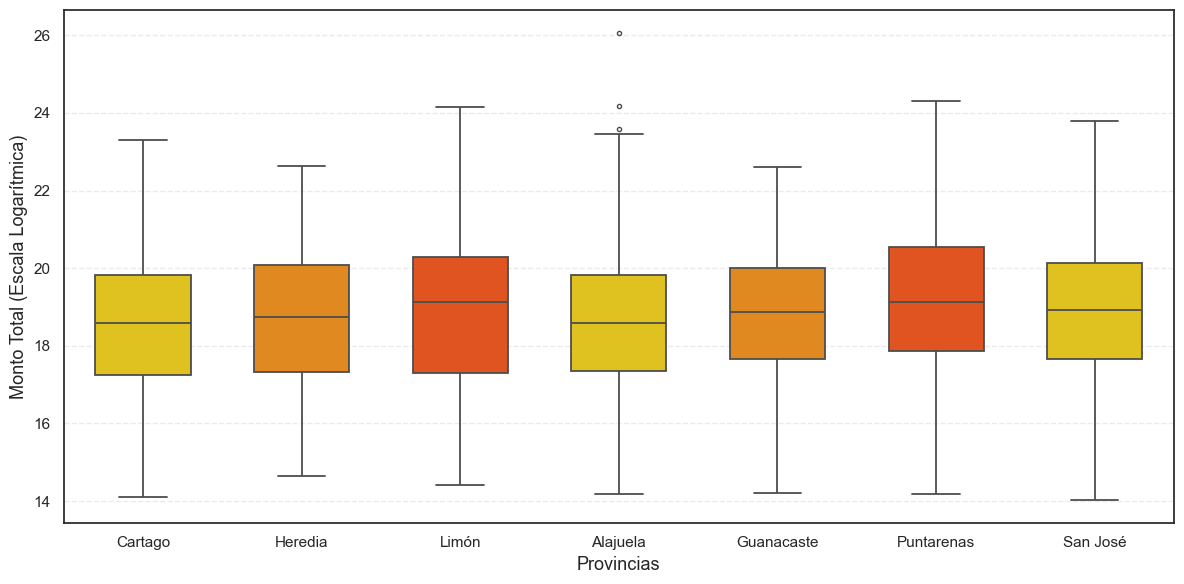

In [42]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df,
    x="provincia",
    y="total",
    palette=paleta_calida,
    width=0.6,
    linewidth=1.3,
    fliersize=3
)

sns.set_style("whitegrid")
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.xlabel("Provincias", fontsize=13)
plt.ylabel("Monto Total (Escala Logarítmica)", fontsize=13)

plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_84548\2591570673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\andre\AppData\Local\Temp\ipykernel_84548\2591570673.py:3: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


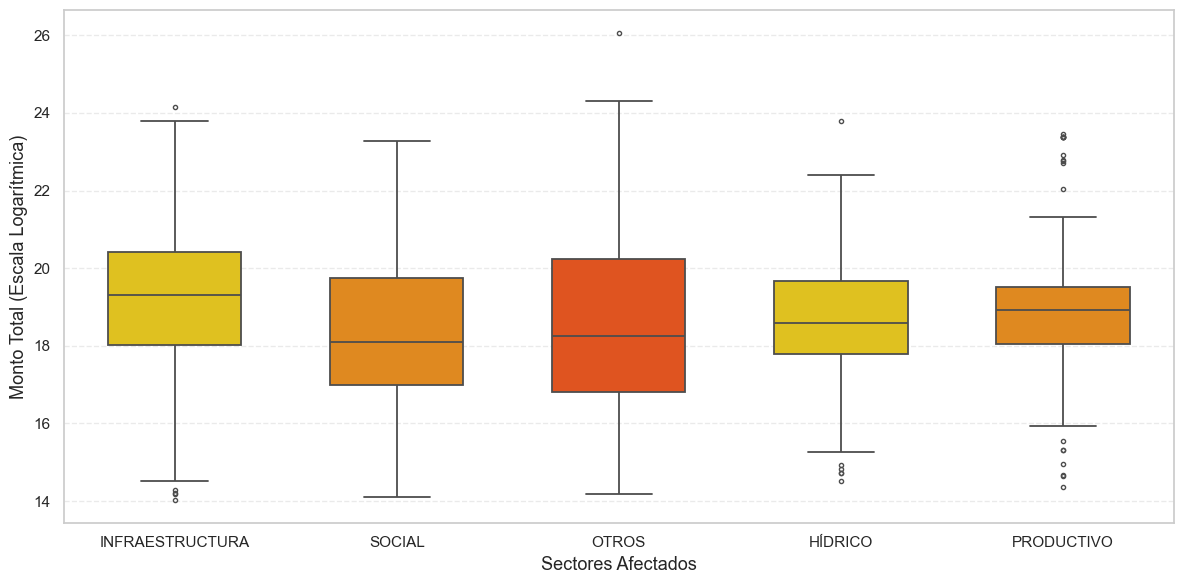

In [43]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df,
    x="sector",
    y="total",
    palette=paleta_calida,
    width=0.6,
    linewidth=1.3,
    fliersize=3
)

sns.set_style("whitegrid")
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.xlabel("Sectores Afectados", fontsize=13)
plt.ylabel("Monto Total (Escala Logarítmica)", fontsize=13)

plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_84548\3495575175.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\andre\AppData\Local\Temp\ipykernel_84548\3495575175.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(


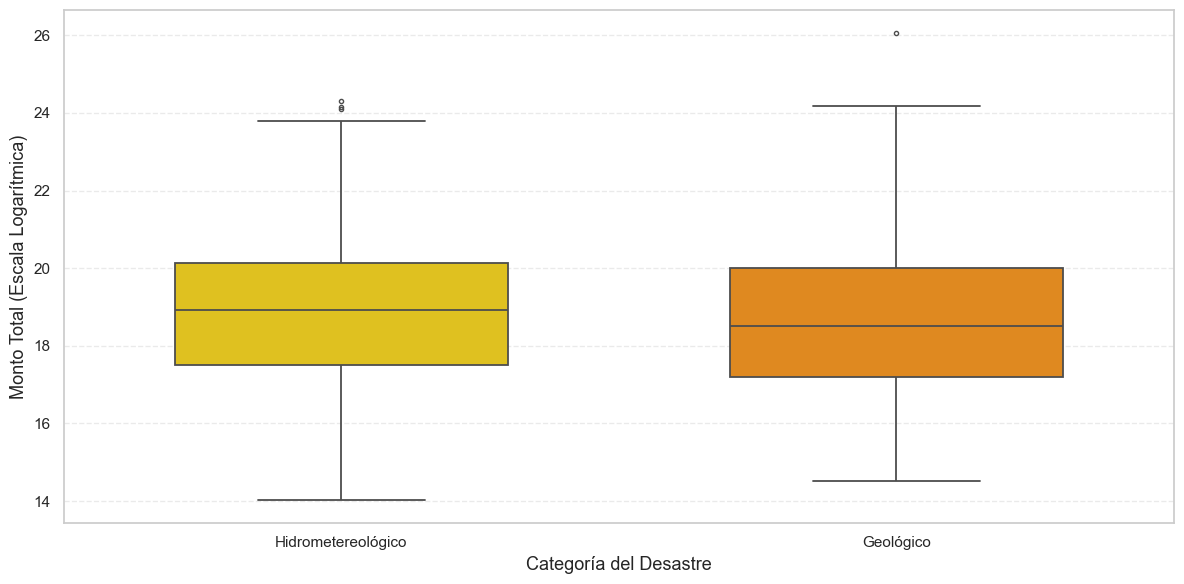

In [44]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df,
    x="categoria",
    y="total",
    palette=paleta_calida,
    width=0.6,
    linewidth=1.3,
    fliersize=3
)

sns.set_style("whitegrid")
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.xlabel("Categoría del Desastre", fontsize=13)
plt.ylabel("Monto Total (Escala Logarítmica)", fontsize=13)

plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_84548\4019233825.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\andre\AppData\Local\Temp\ipykernel_84548\4019233825.py:27: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


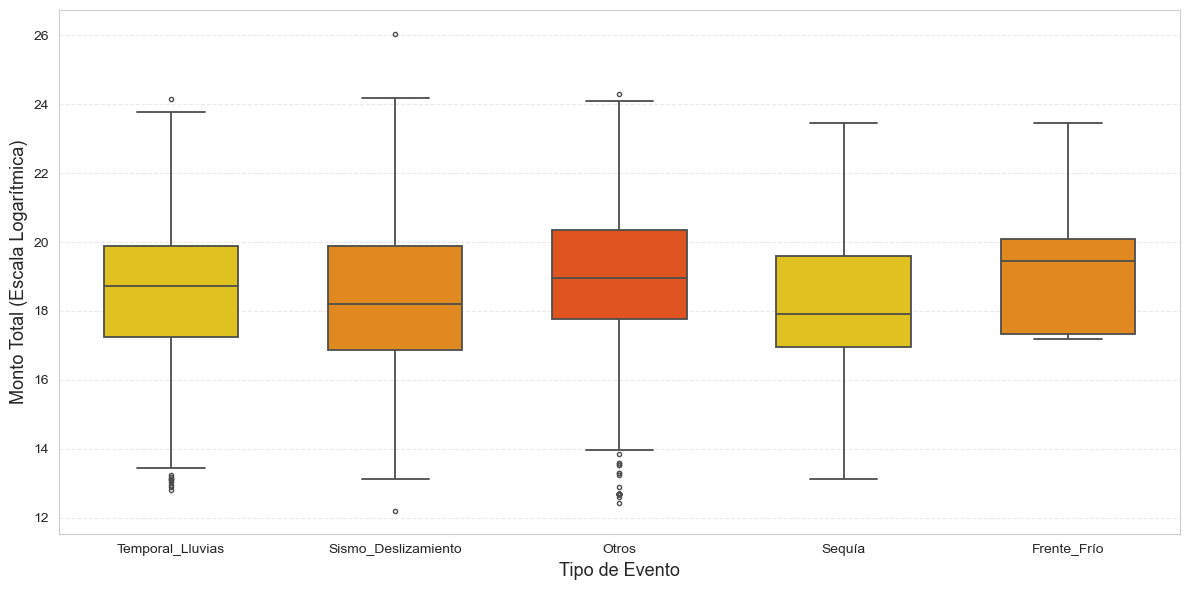

In [16]:
condiciones = [
    df["evento"].str.contains(r"huracán|hurricane|otto|eta|julia", case=False, regex=True),
    df["evento"].str.contains(r"tormenta tropical|bonnie", case=False, regex=True),
    df["evento"].str.contains(r"temporal|lluvia|baja presión|onda tropical|zci|vertiente", case=False, regex=True),
    df["evento"].str.contains(r"frente frío|frente frio|frente", case=False, regex=True),
    df["evento"].str.contains(r"sequía|deficit hídrico|sequia|sequ\?a", case=False, regex=True),
    df["evento"].str.contains(r"sismo|terremoto|deslizamiento", case=False, regex=True),
    df["evento"].str.contains(r"covid|epidemia|dengue|virus|enfermedad", case=False, regex=True)
]

valores = [
    "Huracan",
    "Tormenta_Tropical",
    "Temporal_Lluvias",
    "Frente_Frío",
    "Sequía",
    "Sismo_Deslizamiento",
    "Epidemia"
]

df["evento"] = np.select(condiciones, valores, default="Otros")



plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df,
    x="evento",
    y="total",
    palette=paleta_calida,
    width=0.6,
    linewidth=1.3,
    fliersize=3
)

sns.set_style("whitegrid")
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.xlabel("Tipo de Evento", fontsize=13)
plt.ylabel("Monto Total (Escala Logarítmica)", fontsize=13)

plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## HISTOGRAMAS

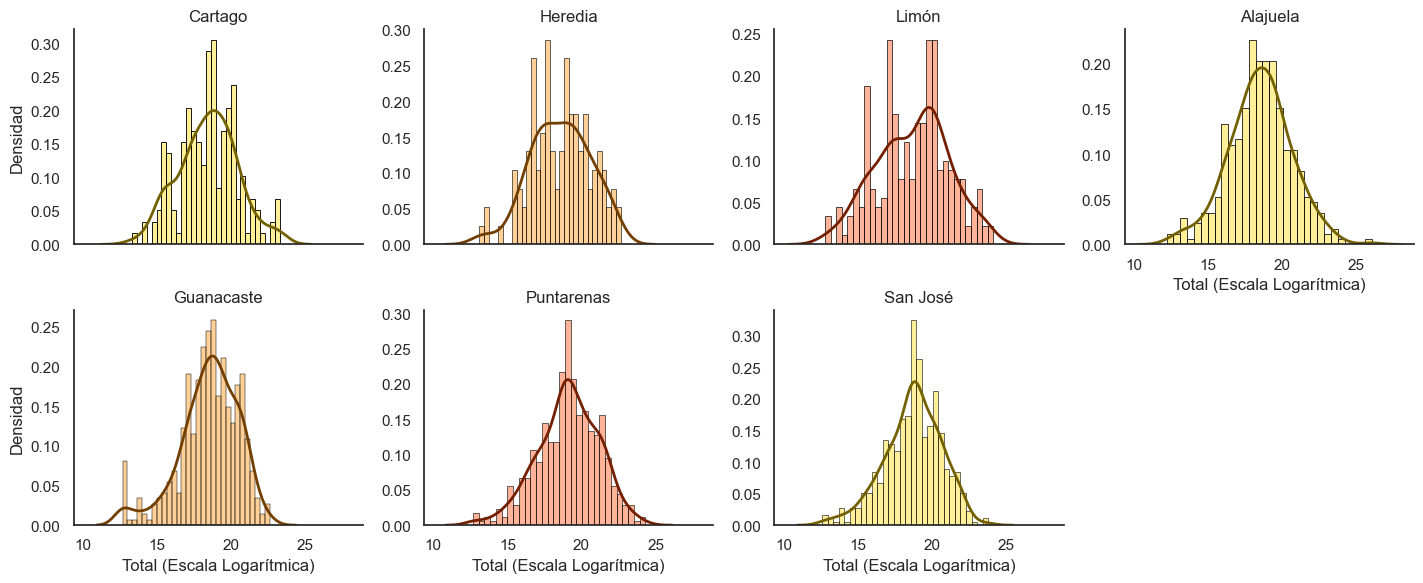

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mc
import colorsys
import itertools

paleta_calida = ["#FFD700", "#FF8C00", "#FF4500"]

def oscurecer_color(color, factor=0.5):

    r, g, b = mc.to_rgb(color)
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    l = max(0, min(1, l * factor))
    r2, g2, b2 = colorsys.hls_to_rgb(h, l, s)
    return (r2, g2, b2)

def facet_hist_kde(df, col_valor, col_facet, x, n = 4):
    sns.set(style="white")

    niveles = list(df[col_facet].dropna().unique())
    ciclo_colores = itertools.cycle(paleta_calida)
    mapa_colores = {nivel: next(ciclo_colores) for nivel in niveles}

    g = sns.FacetGrid(
        df,
        col=col_facet,
        col_wrap=n,
        sharex=True,
        sharey=False,
        height=3,
        aspect=1.2
    )

    def _hist_kde(data, **kwargs):
        nivel = data[col_facet].iloc[0]
        color_base = mapa_colores[nivel]
        color_kde = oscurecer_color(color_base, factor=0.45)

        # Histograma
        sns.histplot(
            data=data,
            x=col_valor,
            stat="density",
            bins=30,
            color=color_base,
            alpha=0.4,
            edgecolor="black"
        )

        sns.kdeplot(
            data=data,
            x=col_valor,
            color=color_kde,
            linewidth=2
        )

    g.map_dataframe(_hist_kde)
    g.set_titles(col_template="{col_name}")
    g.set_axis_labels(x, "Densidad")
    plt.tight_layout()
    plt.show()

facet_hist_kde(df, col_valor="total", col_facet="provincia", x = 'Total (Escala Logarítmica)')


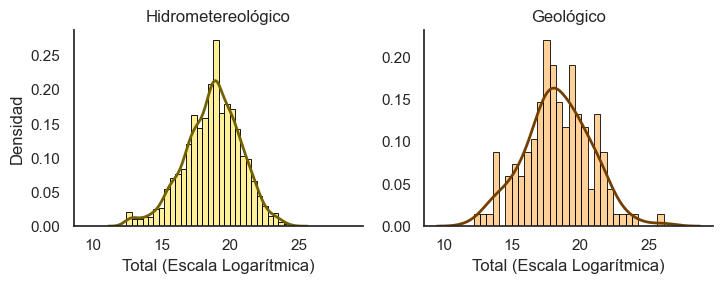

In [37]:
facet_hist_kde(df, col_valor="total", col_facet="categoria", x = 'Total (Escala Logarítmica)')

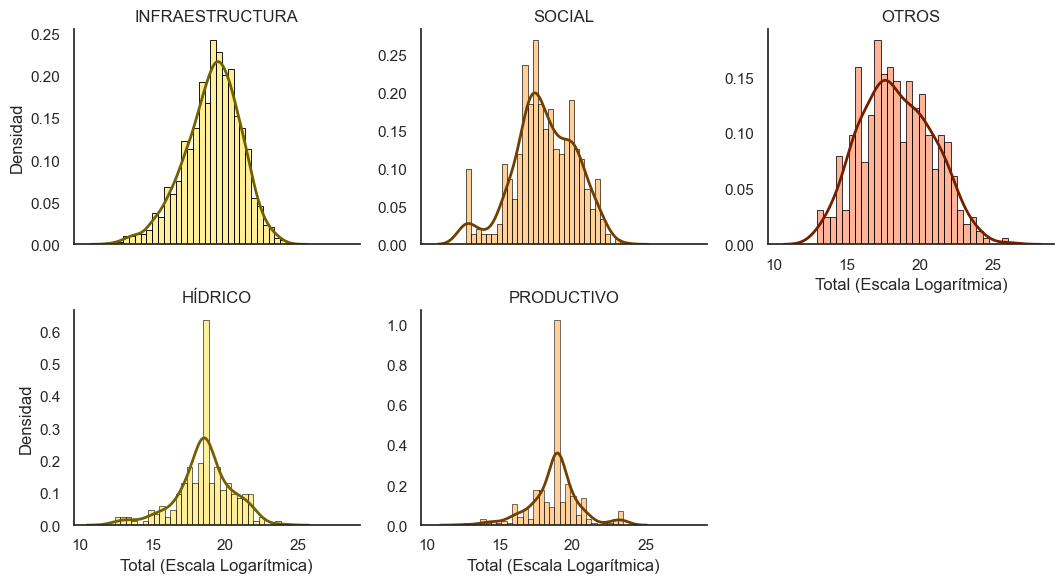

In [40]:
facet_hist_kde(df, col_valor="total", col_facet="sector", x = 'Total (Escala Logarítmica)', n = 3)